In [206]:
import pandas as pd
import cv2
import os
import numpy as np
import faiss
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [207]:
paths_db = pd.read_csv("database\db.csv", index_col=0)
paths = paths_db["path"].values.tolist()

In [208]:
orb = cv2.ORB_create()
kps = []
descs = []
path_img_ref = paths[0]

img_ref = cv2.imread(path_img_ref)
img_ref= cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY)

# Display the image (optional)
# plt.imshow(img, cmap='gray')
# plt.title(f"Image: {path}")
# plt.axis('off')
# plt.show()

# Detect and compute SIFT keypoints and descriptors
kp_ref, desc_ref = orb.detectAndCompute(img_ref, None)

print(f"Processed {len(kp_ref)} keypoints in image: {path_img_ref}")

Processed 254 keypoints in image: archive\Training Data\Coast\Coast-Train (1).jpeg


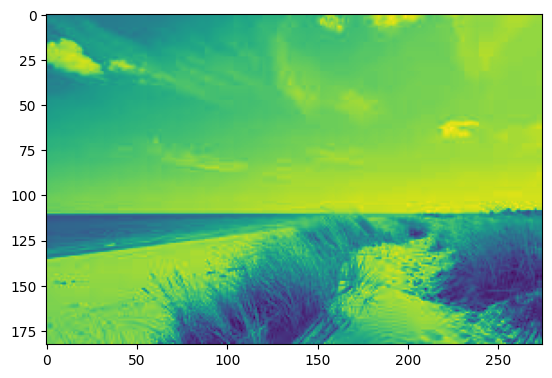

In [209]:
plt.imshow(img_ref)
plt.show()

In [210]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)  # Para ORB usa NORM_HAMMING, crossCheck=False

matches_result = []

for path in paths[1:]:
    img = cv2.imread(path)
    
    # Check if the image is loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {path}")
        continue  # Skip to the next image
    
    # Convert to HSV and extract the V channel
    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # value_channel = hsv_image[:, :, 2]
    
    # Detect and compute keypoints and descriptors for the current image
    keypoints_cmp, descriptors_cmp = orb.detectAndCompute(img, mask=None)
    
    # Check if descriptors are valid
    if descriptors_cmp is None:
        print(f"No descriptors found for image {path}. Skipping.")
        continue

    # Perform KNN Matching
    knn_matches = bf.knnMatch(desc_ref, descriptors_cmp, k=2)

    # Apply the ratio test to filter matches
    good_matches = []
    for m, n in knn_matches:
        if m.distance < 0.75 * n.distance:  # Ratio test
            good_matches.append(m)
    
    # Store the result: number of good matches, path, and matches
    matches_result.append((len(good_matches), path, good_matches, keypoints_cmp, img))

# Sort results by the number of good matches in descending order
matches_result = sorted(matches_result, key=lambda x: x[0], reverse=True)




No descriptors found for image archive\Training Data\Desert\Desert-Train (1057).jpeg. Skipping.


Imagen 1: archive\Training Data\Desert\Desert-Train (1003).jpeg con 19 coincidencias


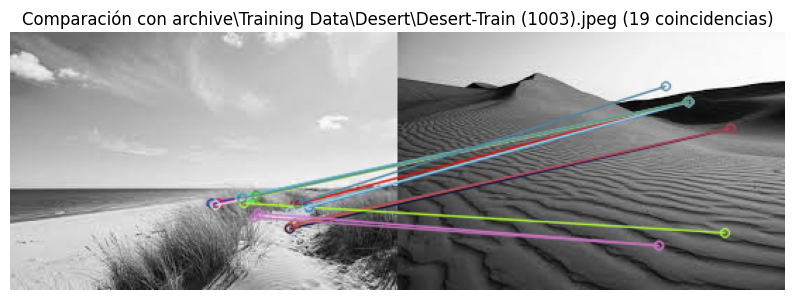

Imagen 2: archive\Training Data\Glacier\Glacier-Train (1013).jpeg con 13 coincidencias


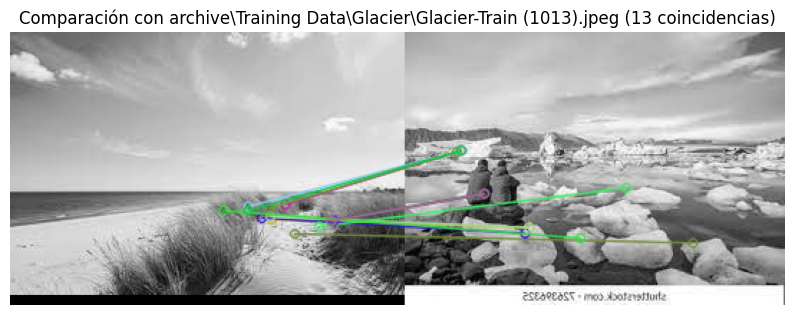

Imagen 3: archive\Training Data\Desert\Desert-Train (100).jpeg con 11 coincidencias


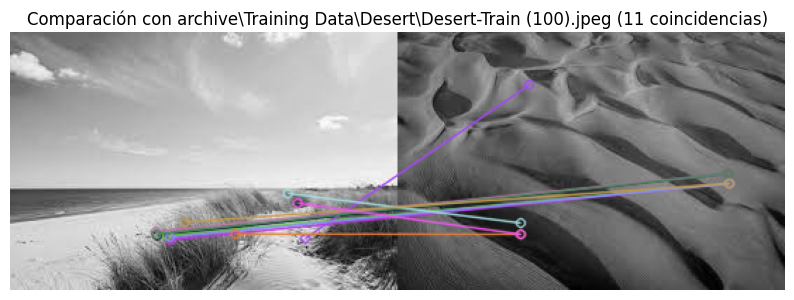

Imagen 4: archive\Training Data\Desert\Desert-Train (1055).jpeg con 10 coincidencias


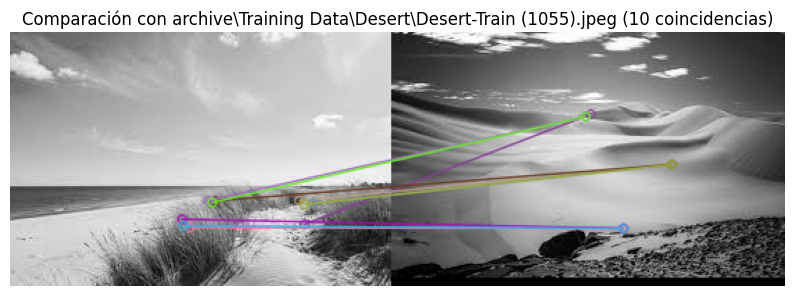

Imagen 5: archive\Training Data\Coast\Coast-Train (1029).jpeg con 9 coincidencias


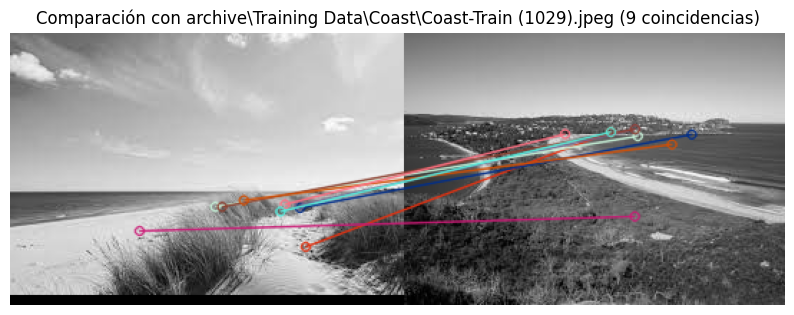

In [211]:
# Mostrar las 5 mejores coincidencias
img_ref= cv2.cvtColor(img_ref, cv2.COLOR_GRAY2RGB)
for i, (num_matches, url, matches, keypoints_cmp, comparison_image) in enumerate(matches_result[:5]):
    print(f"Imagen {i + 1}: {url} con {num_matches} coincidencias")
    # Dibujar coincidencias
    im_match = cv2.drawMatches(img_ref[..., ::-1], kp_ref,
                               comparison_image[..., ::-1], keypoints_cmp, matches[:50],
                               None, flags=2)
    # Mostrar coincidencias
    plt.figure(figsize=(10, 10))
    plt.imshow(im_match)
    plt.title(f"Comparación con {url} ({num_matches} coincidencias)")
    plt.axis('off')
    plt.show()

Imagen 1: archive\Training Data\Desert\Desert-Train (1003).jpeg con 19 coincidencias


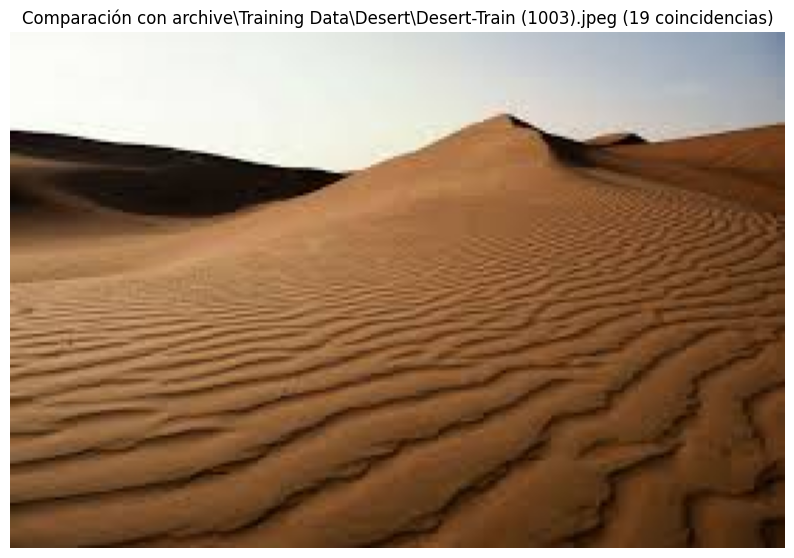

Imagen 2: archive\Training Data\Glacier\Glacier-Train (1013).jpeg con 13 coincidencias


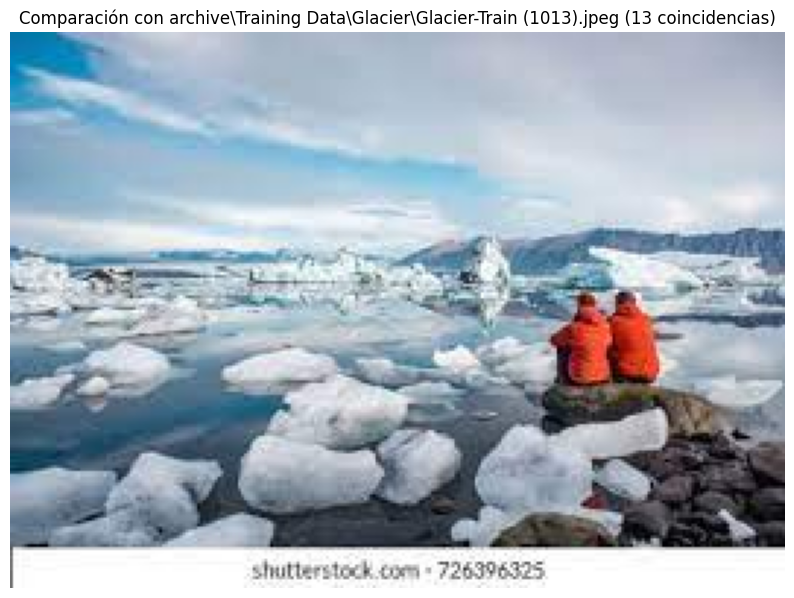

Imagen 3: archive\Training Data\Desert\Desert-Train (100).jpeg con 11 coincidencias


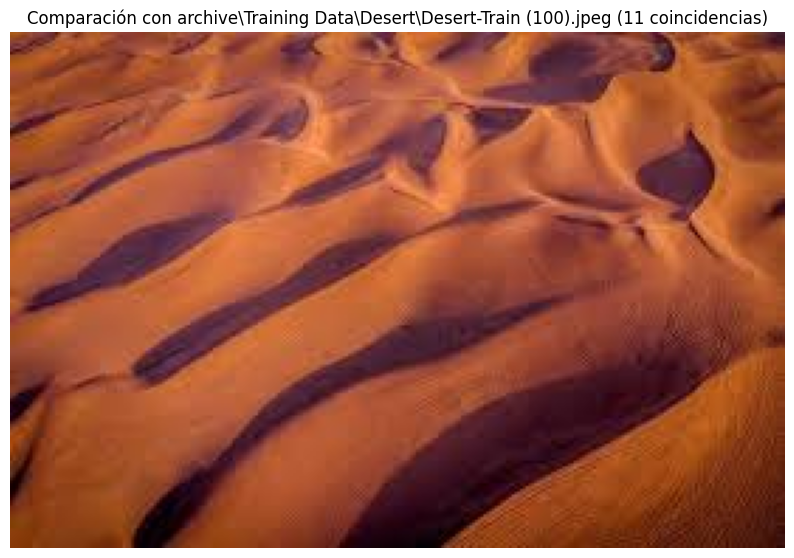

Imagen 4: archive\Training Data\Desert\Desert-Train (1055).jpeg con 10 coincidencias


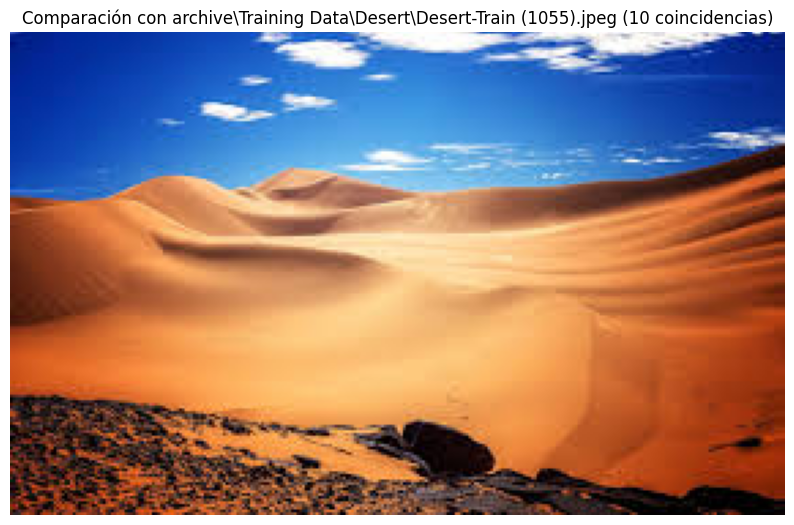

Imagen 5: archive\Training Data\Coast\Coast-Train (1029).jpeg con 9 coincidencias


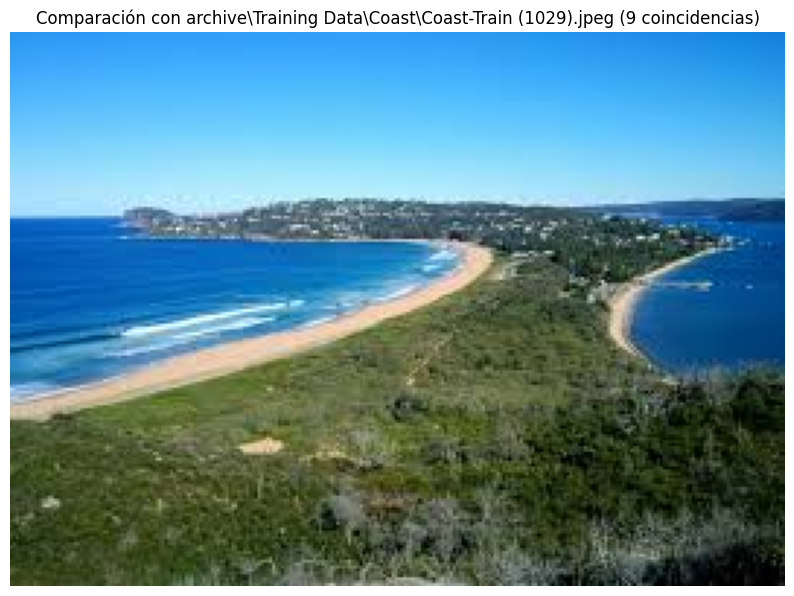

: 

In [ ]:

for i, (num_matches, url, matches, keypoints_cmp, comparison_image) in enumerate(matches_result[:5]):
    print(f"Imagen {i + 1}: {url} con {num_matches} coincidencias")
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB))
    plt.title(f"Comparación con {url} ({num_matches} coincidencias)")
    plt.axis('off')
    plt.show()